In [118]:
import pandas as pd
import numpy as np
import pyperformance
import os

In [139]:
aliases = {
    "3.9.10" : "3.9.10",
    "nogil3.9" : "3.9.10-nogil",
    "3.9.18" : "3.9.18",
    "3.10" : "3.10.13",
    "3.11" : "3.11.8",
    "3.12.0" : "3.12.0",
    "3.12.2" : "3.12.2",
    "nogil3.12" : "3.12.0-nogil"
}

In [140]:
df = pd.DataFrame()

In [141]:
_39vs39 = pd.read_csv("./pyperf_res/csvs/39vs39.csv")
df['Benchmark'] = _39vs310["Benchmark"]
benchmarks = list(df['Benchmark'])
results = {
    '3.9.10':'39vs3910.csv',
    'nogil-3.9':'39vsnogil.csv',
    '3.9.18':'39vs39.csv',
    '3.10.13':'39vs310.csv',
    '3.11.8':'39vs311.csv',
    '3.12.0':'39vs3120.csv',
    'nogil-3.12':'39vsnogil312.csv',
    '3.12.2':'39vs312.csv'
}

In [142]:
for key,val in results.items():
    nullbench = pd.read_csv(f'./pyperf_res/csvs/{val}')[['Benchmark','Changed']]
    nullbench = list(nullbench.values.tolist())
    for i in range(len(benchmarks)):
        if benchmarks[i] != nullbench[i][0]:
            nullbench.insert(i, [benchmarks[i],np.nan])
    nullbenchmarks_vals = [row[1] for row in nullbench]
    df[key] = nullbenchmarks_vals

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Benchmark   94 non-null     object 
 1   3.9.10      94 non-null     float64
 2   nogil-3.9   90 non-null     float64
 3   3.9.18      94 non-null     float64
 4   3.10.13     94 non-null     float64
 5   3.11.8      94 non-null     float64
 6   3.12.0      94 non-null     float64
 7   nogil-3.12  92 non-null     float64
 8   3.12.2      94 non-null     float64
dtypes: float64(8), object(1)
memory usage: 6.7+ KB


In [144]:
pd.set_option('display.max_rows', 500)

In [145]:
df

,Benchmark,3.9.10,nogil-3.9,3.9.18,3.10.13,3.11.8,3.12.0,nogil-3.12,3.12.2
0,2to3,4.810100e-01,5.314500e-01,4.739100e-01,3.951600e-01,3.113200e-01,3.448900e-01,3.095100e-01,3.433800e-01
1,async_generators,6.001800e-01,7.973200e-01,5.833000e-01,5.339400e-01,4.345900e-01,6.242800e-01,4.423700e-01,6.152500e-01
2,async_tree_cpu_io_mixed,1.320000e+00,8.973000e-01,1.320000e+00,1.100000e+00,9.407500e-01,8.702400e-01,8.757400e-01,8.768200e-01
3,async_tree_eager,9.510500e-01,5.188800e-01,9.427100e-01,8.221500e-01,6.080700e-01,1.392000e-01,6.208700e-01,1.449700e-01
4,async_tree_eager_cpu_io_mixed,1.330000e+00,8.851500e-01,1.320000e+00,1.110000e+00,9.459800e-01,5.008700e-01,8.825100e-01,5.048900e-01
5,async_tree_eager_io,2.230000e+00,1.130000e+00,2.220000e+00,1.920000e+00,1.390000e+00,1.390000e+00,1.390000e+00,1.410000e+00
6,async_tree_eager_memoization,1.160000e+00,6.375600e-01,1.140000e+00,1.000000e+00,7.378400e-01,3.268700e-01,7.456200e-01,3.338700e-01
7,async_tree_io,2.220000e+00,1.130000e+00,2.190000e+00,1.920000e+00,1.400000e+00,1.300000e+00,1.390000e+00,1.300000e+00
8,async_tree_memoization,1.150000e+00,6.382700e-01,1.140000e+00,1.010000e+00,7.359200e-01,7.099600e-01,7.465300e-01,7.156500e-01
9,async_tree_none,9.485400e-01,5.248700e-01,9.316400e-01,8.246200e-01,6.061500e-01,5.666200e-01,6.205700e-01,5.747500e-01


In [152]:
dfnotnull = df.dropna()
dfnotnull.reset_index(inplace=True, drop = True)
dfnotnull

,Benchmark,3.9.10,nogil-3.9,3.9.18,3.10.13,3.11.8,3.12.0,nogil-3.12,3.12.2
0,2to3,4.810100e-01,5.314500e-01,4.739100e-01,3.951600e-01,3.113200e-01,3.448900e-01,3.095100e-01,3.433800e-01
1,async_generators,6.001800e-01,7.973200e-01,5.833000e-01,5.339400e-01,4.345900e-01,6.242800e-01,4.423700e-01,6.152500e-01
2,async_tree_cpu_io_mixed,1.320000e+00,8.973000e-01,1.320000e+00,1.100000e+00,9.407500e-01,8.702400e-01,8.757400e-01,8.768200e-01
3,async_tree_eager,9.510500e-01,5.188800e-01,9.427100e-01,8.221500e-01,6.080700e-01,1.392000e-01,6.208700e-01,1.449700e-01
4,async_tree_eager_cpu_io_mixed,1.330000e+00,8.851500e-01,1.320000e+00,1.110000e+00,9.459800e-01,5.008700e-01,8.825100e-01,5.048900e-01
5,async_tree_eager_io,2.230000e+00,1.130000e+00,2.220000e+00,1.920000e+00,1.390000e+00,1.390000e+00,1.390000e+00,1.410000e+00
6,async_tree_eager_memoization,1.160000e+00,6.375600e-01,1.140000e+00,1.000000e+00,7.378400e-01,3.268700e-01,7.456200e-01,3.338700e-01
7,async_tree_io,2.220000e+00,1.130000e+00,2.190000e+00,1.920000e+00,1.400000e+00,1.300000e+00,1.390000e+00,1.300000e+00
8,async_tree_memoization,1.150000e+00,6.382700e-01,1.140000e+00,1.010000e+00,7.359200e-01,7.099600e-01,7.465300e-01,7.156500e-01
9,async_tree_none,9.485400e-01,5.248700e-01,9.316400e-01,8.246200e-01,6.061500e-01,5.666200e-01,6.205700e-01,5.747500e-01


In [153]:
import matplotlib.pyplot as plt
import random

In [171]:
def get_graph(cols, savefig=False):
    df = dfnotnull
    plt.figure(figsize=(25,6))
    columns = list(df.columns[1:])
    
    colors = "blue,red,orange,magenta".split(",")
    for col in cols:
        vals = list(df[col].astype(float))
        random.shuffle(colors)
        plt.plot(list(range(len(df.index))), vals, color=colors.pop())
        
    plt.ylabel("Duration of benchmark")
    plt.xlabel("Benchmark")
    legend = cols.copy()
    plt.legend(legend)
    plt.xlim((0,len(list(df['Benchmark']))))
    ticks = [i for i in range(len(list(df['Benchmark'])))]
    plt.xticks(ticks, list(df['Benchmark']), rotation=-90)
    if savefig:
        cols.reverse()
        plt.savefig(f"./images/{'_'.join(cols)}.png", bbox_inches='tight',transparent=False, pad_inches=0.1)
    plt.show()

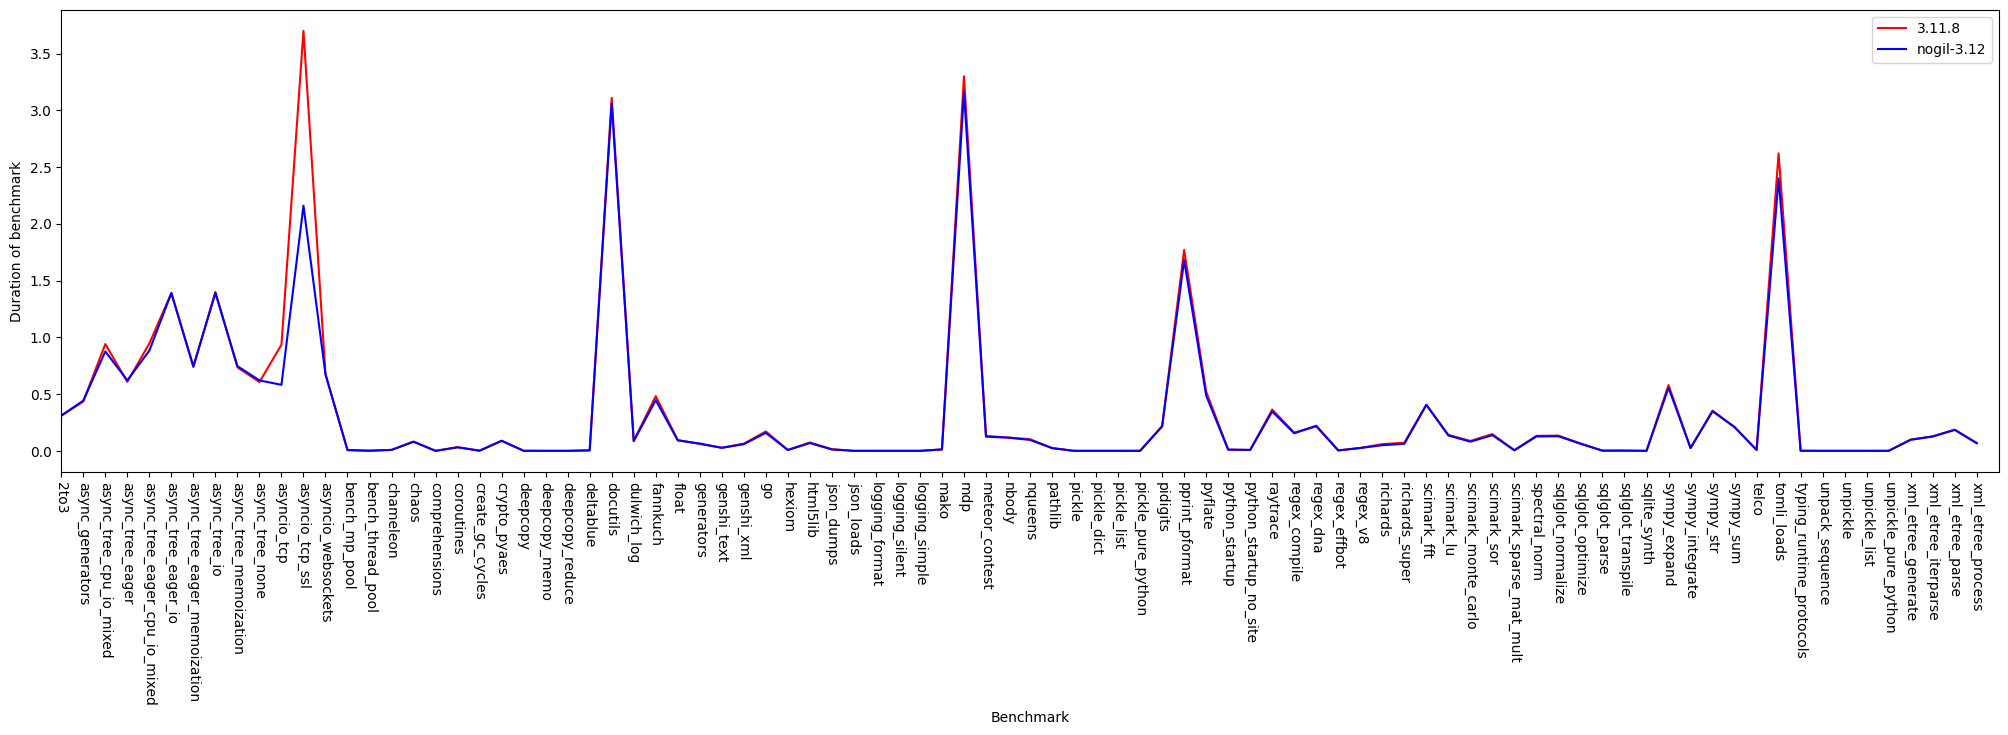

In [172]:
get_graph(['3.11.8','nogil-3.12'], True)

## Compute avg time difference

In [183]:
times = []

In [184]:
_3910_time = np.sum(df['3.9.10'])
_3910_avg_time = _3910_time / len(df.index)
times.append(_3910_avg_time)

In [185]:
_3918_time = np.sum(df['3.9.18'])
_3918_avg_time = _3918_time / len(df.index)
times.append(_3918_avg_time)

In [186]:
nogil39_time = np.sum(df['nogil-3.9'])
nogil39_avg_time = nogil39_time / len(df.index)
times.append(nogil39_avg_time)

In [187]:
_310_time = np.sum(df['3.10.13'])
_310_avg_time = _310_time / len(df.index)
times.append(_310_avg_time)

In [188]:
_311_time = np.sum(df['3.11.8'])
_311_avg_time = _311_time / len(df.index)
times.append(_311_avg_time)

In [189]:
_3120_time = np.sum(df['3.12.0'])
_3120_avg_time = _3120_time / len(df.index)
times.append(_3120_avg_time)

In [190]:
_nogil3120_time = np.sum(df['nogil-3.12'])
_nogil3120_avg_time = _nogil3120_time / len(df.index)
times.append(_nogil3120_avg_time)

In [191]:
_3122_time = np.sum(df['3.12.2'])
_3122_avg_time = _3122_time / len(df.index)
times.append(_3122_avg_time)

In [192]:
times

[0.4671347741669149,
 0.46063743155478715,
 0.41224901509361694,
 0.40484014113308514,
 0.33318994519372336,
 0.31320524139638295,
 0.3037668048044681,
 0.313467691597766]

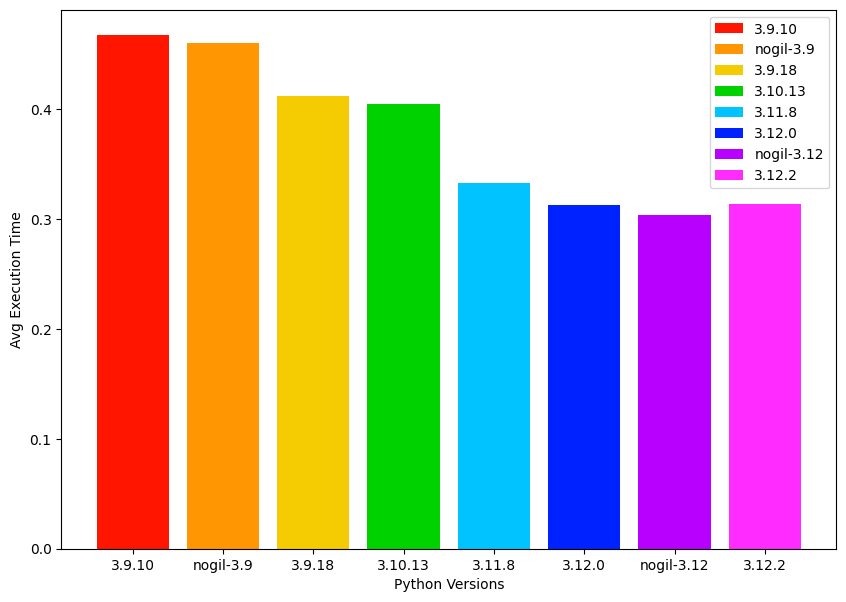

In [236]:
plt.figure(figsize=(10,7))
labels = list(df.columns)[1:]

colors = ["#ff1500","#ff9602","#f5cc02","#00d200","#00c3ff","#0022ff","#b700ff","#ff2bff"]
colors.reverse()
for i in range(len(labels)):
    plt.bar(i, times[i], color=colors.pop())
plt.xlabel("Python Versions")
plt.ylabel("Avg Execution Time")
plt.legend(labels)
ticks = [i for i in range(len(times))]
plt.xticks(ticks, labels=labels)
plt.savefig(f"./images/confronto.png", bbox_inches='tight',transparent=False, pad_inches=0.1)
plt.show()

In [ ]:
8